<a href="https://colab.research.google.com/github/adapateja/Machine-learning/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data=pd.read_csv("/content/diabetes.csv")
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
x=data['age'].values
y=data['diabetes'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [38]:
X_train.shape, y_train.shape


((576, 1), (576, 1))

In [39]:
clasifymodel=LogisticRegression(C=0.5)
clasifymodel.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5)

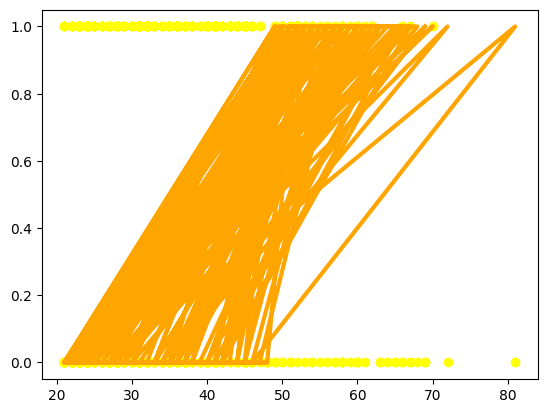

In [40]:
plt.scatter(X_train, y_train, color='yellow')
plt.plot(X_train, clasifymodel.predict(X_train), color='orange', linewidth=3)
plt.show()

In [41]:
clasifymodel.classes_

array([0, 1])

In [42]:
intercept=clasifymodel.intercept_
print("intercept is",intercept[0])

intercept is -2.032171015751383


In [44]:
slope=clasifymodel.coef_
print("slope is",slope[0])

slope is [0.04230922]


In [47]:
clasifymodel.predict_proba(X_test)

array([[0.75051635, 0.24948365],
       [0.74251065, 0.25748935],
       [0.72600368, 0.27399632],
       [0.46864135, 0.53135865],
       [0.67273584, 0.32726416],
       [0.73433898, 0.26566102],
       [0.65384114, 0.34615886],
       [0.45812118, 0.54187882],
       [0.72600368, 0.27399632],
       [0.42682027, 0.57317973],
       [0.70004512, 0.29995488],
       [0.44763822, 0.55236178],
       [0.4062584 , 0.5937416 ],
       [0.72600368, 0.27399632],
       [0.56345194, 0.43654806],
       [0.66335377, 0.33664623],
       [0.62458115, 0.37541885],
       [0.75835416, 0.24164584],
       [0.34676035, 0.65323965],
       [0.68198178, 0.31801822],
       [0.61460943, 0.38539057],
       [0.75835416, 0.24164584],
       [0.72600368, 0.27399632],
       [0.52147345, 0.47852655],
       [0.75051635, 0.24948365],
       [0.75835416, 0.24164584],
       [0.70885343, 0.29114657],
       [0.59438221, 0.40561779],
       [0.73433898, 0.26566102],
       [0.68198178, 0.31801822],
       [0.

In [49]:
y_pred = clasifymodel.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0]


In [51]:
print("accuracy is",clasifymodel.score(X_test, y_test))


accuracy is 0.6666666666666666


In [56]:
print("CONFUSION MATRIX IS::\n")
confusion_matrix(y_test, y_pred)


CONFUSION MATRIX IS::



array([[119,  11],
       [ 53,   9]])

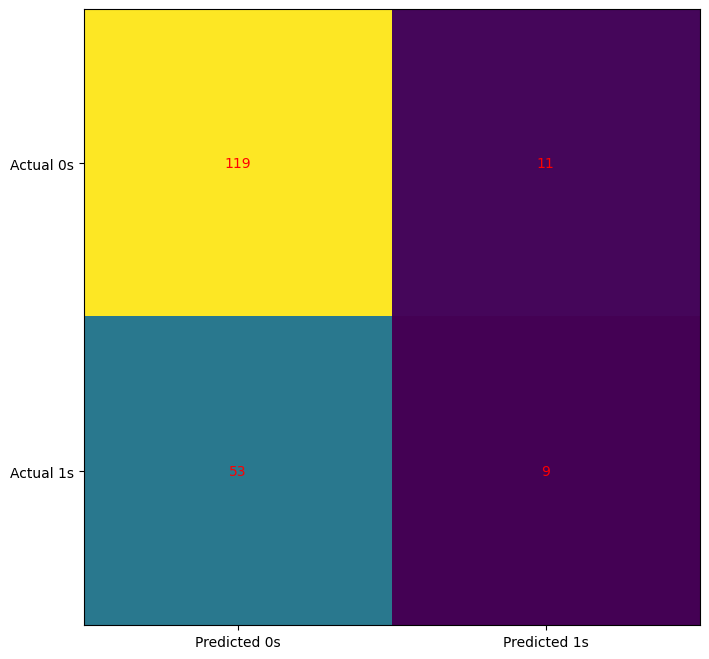

In [57]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
     


In [59]:
print("classification report is::::\n")
print(classification_report(y_test,y_pred))

classification report is::::

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       130
           1       0.45      0.15      0.22        62

    accuracy                           0.67       192
   macro avg       0.57      0.53      0.50       192
weighted avg       0.61      0.67      0.60       192

